In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
def f(y, t):
    return t + 2.*y

# Construyendo la solucion exacta
def Exactf(t_):
    return -0.5*t_ - (1.-np.exp(2.*t_))/4.

In [3]:
Tmin, Tmax, Npoints = 0.,1., 5
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
yexacta = np.zeros(Npoints)
yexacta = Exactf(t)

# Implementemos Runge-kutta de orden 4 

In [11]:
def GetRunge4(y,t,deltat):
    print('Corriendo Runge-Kutta 4')
    for i in range(1,Npoints):
        k1 = f(y[i-1],t[i-1])
        k2 = f(y[i-1] + 0.5*k1*deltat, t[i-1]+0.5*deltat)
        k3 = f(y[i-1] + 0.5*k2*deltat, t[i-1]+0.5*deltat)
        k4 = f(y[i-1] + k3*deltat, t[i-1]+deltat)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3 + k4)/6.

In [5]:
y4 = np.zeros(Npoints)
y4[0] = 0.
GetRunge4(y4,t,deltat)

Corriendo Runge-Kutta 4


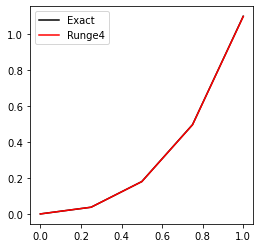

In [6]:
plt.figure(figsize=(4,4))
plt.plot(t,yexacta, c='k',label='Exact')
plt.plot(t,y4, c='r',label='Runge4')
plt.legend(loc=0)
plt.show()

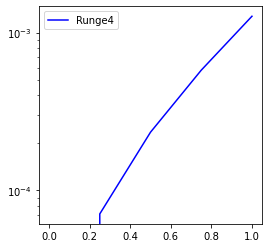

In [7]:
plt.figure(figsize=(4,4))
plt.plot(t,np.abs(yexacta-y4), c='b',label='Runge4')
plt.legend(loc=0)
plt.yscale('log')
plt.show()

# Estudiemos la estabilidad del método Runge-kutta 4

In [8]:
def fc(z):
    return 1.j*z

def ComplexRungeKutta():
    global t
    global deltat
    global z
    
    k1 = fc(z)
    k2 = fc(z + 0.5*k1*deltat)
    k3 = fc(z + 0.5*k2*deltat)
    k4 = fc(z + k3*deltat)
    
    z+= deltat*(k1+2*k2+2*k3+k4)/6.
    t+=deltat

[6.28318531+0.00000000e+00j 0.99998251-9.91717168e-05j]


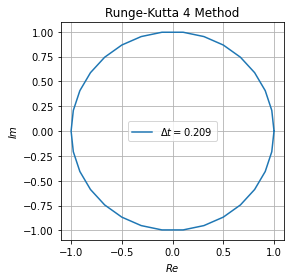

In [9]:
t = 0.
TMax = 2*np.pi

z = 1.
Npoints = 30

deltat = TMax/np.int(Npoints)

data=[[t,z]] # El tiempo 0

for i in range(Npoints):
    ComplexRungeKutta()
    data.append([t,z])
    
data = np.array(data)
    
print(data[-1])   

plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Runge-Kutta 4 Method")
plt.plot(np.real(data[:,1]),np.imag(data[:,1]), label=r'$\Delta t = %.3f$' %(deltat) )
plt.ylabel(r'$Im$')
plt.xlabel(r'$Re$')
plt.legend()
plt.grid()

# Necesitamos un inicializador


In [3]:
# inplementemos el método para inicializar los metodos multipaso
def GetRungeA4(y,t,deltat, Npoints):
    print('Corriendo método de Runge-Kutta 4 para inicializar adams')
    for i in range(1,Npoints): # Esto debe corresponder con el número de puntos para inicializar adams
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + 0.5*k1*deltat, t[i-1]+0.5*deltat)
        k3 = f(y[i-1] + 0.5*k2*deltat, t[i-1]+0.5*deltat)
        k4 = f(y[i-1] + k3*deltat, t[i-1]+deltat)
        y[i] = y[i-1] + deltat*(k1 + 2.*k2 + 2.*k3+k4)/6.

In [17]:
def f(y, t):
    return 40. - 0.2*y

def exac_f(t):
    return 200. - 175.*np.exp(-0.2*t)

In [8]:
Tmin, Tmax, Npoints = 1.,10., 101
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)
yexact = exac_f(t)

0.09


In [9]:
y = np.zeros(Npoints)
y[0] = 25.

yr = np.zeros(Npoints)
yr[0] = 25.

In [12]:
GetRungeA4(y,t,deltat,5)
GetRunge4(yr,t,deltat)

yc = y.copy()

print(y)

Corriendo método de Runge-Kutta 4 para inicializar adams
Corriendo Runge-Kutta 4
[2.50000000e+01 5.96474226e+04 1.08380663e+57            nan
            nan 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0

<ipython-input-6-d15b7a10eaeb>:2: RuntimeWarning: overflow encountered in double_scalars
  return x*(y**2) -2*(y/x) -(1/x**3)
<ipython-input-6-d15b7a10eaeb>:2: RuntimeWarning: invalid value encountered in double_scalars
  return x*(y**2) -2*(y/x) -(1/x**3)


# Calculemos nuestro metodo multi-paso

In [13]:
def GetAdams(y,t,deltat,orden):
    
    for i in range(orden,Npoints):
        # A orden 2
        # Predictor
        #y[i] = y[i-1] + deltat*( 23.*f(y[i-1],t[i-1]) - 16 * f(y[i-2],t[i-2]) + 5*f(y[i-3],t[i-3]))/12.
        #yp[i] = y[i]
        # Corrector
        #y[i] = y[i-1] + deltat*(9.*f(y[i],t[i])+19.*f(y[i-1],t[i-1])- 5.*f(y[i-2],t[i-2])+ 1.*f(y[i-3],t[i-3]))/24.

        # A orden 3
        #y[i] = y[i-1] + deltat*(55.*f(y[i-1],t[i-1])-59.*f(y[i-2],t[i-2])+37.*f(y[i-3],t[i-3])-9.*f(y[i-4],t[i-4]))/24.
        #yc[i] = y[i]  
        #yc[i] = yc[i-1] + deltat*(251.*f(yc[i],t[i])+646.*f(yc[i-1],t[i-1])- 264.*f(yc[i-2],t[i-2])+ 106.*f(yc[i-3],t[i-3])-19.*f(yc[i-4],t[i-4]))/720.
        
        #A orden 4
        y[i] = y[i-1] + deltat*(1901.*f(y[i-1],t[i-1])-2774.*f(y[i-2],t[i-2])+2616.*f(y[i-3],t[i-3])-1274.*f(y[i-4],t[i-4])+251*f(y[i-5],t[i-5]))/720
        yc[i] = y[i]  
        yc[i] = yc[i-1] + deltat*(475.*f(yc[i],t[i]) + 1427.*f(yc[i-1],t[i-1])-798.*f(y[i-2],t[i-2])+482.*f(y[i-3],t[i-3])-173.*f(y[i-4],t[i-4])+27*f(y[i-5],t[i-5]))/1440
    

In [14]:
GetAdams(y,t,deltat,5)

In [15]:
for i in range(Npoints):
    print(t[i],yexact[i],yr,yc[i],y[i])

1.0 1.0 [2.50000000e+01 5.96474226e+04 1.08380663e+57            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan 

            nan] nan nan
9.91 0.010182459491630528 [2.50000000e+01 5.96474226e+04 1.08380663e+57            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan    

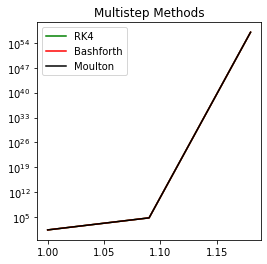

In [16]:
plt.figure(figsize=(4,4))
plt.subplot(111)
plt.title("Multistep Methods")
plt.plot(t,np.abs(yexact-yr),c='g',label='RK4')
plt.plot(t,np.abs(yexact-y),c='r',label='Bashforth')
plt.plot(t,np.abs(yexact-yc),c='k',label='Moulton')
plt.legend(loc=0)
plt.yscale('log')